In [7]:
lotto = pd.read_csv("lotto.csv")

In [20]:
lotto = lotto.rename(columns={"53등 당첨금액": "5등 당첨금액"})

In [70]:
len(lotto)

830

In [78]:
for i in range(len(lotto)):
    lotto["1등 당첨금액"].values[i] = lotto["1등 당첨금액"].values[i].replace(",","")
    lotto["1등 당첨금액"].values[i] = lotto["1등 당첨금액"].values[i].replace("원","")
    lotto["1등 당첨금액"].values[i] = int(lotto["1등 당첨금액"].values[i])

In [80]:
lotto.sort_values(by="1등 당첨금액", ascending=False).head()

,회차,추첨일,1등 당첨자수,1등 당첨금액,2등 당첨자수,2등 당첨금액,3등 당첨자수,3등 당첨금액,4등 당첨자수,4등 당첨금액,5등 당첨자수,5등 당첨금액,1번,2번,3번,4번,5번,6번,보너스
811,19,2003.04.12,1,40722959400,14,"297,278,500원",697,"5,971,100원",55154,"150,900원",1135991,"10,000원",6,30,38,39,40,43,26
805,25,2003.05.24,2,24227745300,28,"175,267,400원",1111,"4,417,100원",58903,"166,600원",1096200,"10,000원",2,4,21,26,43,44,16
810,20,2003.04.19,1,19352212800,14,"230,383,400원",888,"3,632,100원",48158,"133,900원",827470,"10,000원",10,14,18,20,23,30,41
787,43,2003.09.27,1,17749630800,21,"140,870,000원",926,"3,194,600원",45078,"131,200원",776043,"10,000원",6,31,35,38,39,44,1
815,15,2003.03.15,1,17014245000,16,"177,231,700원",509,"5,571,100원",39202,"144,600원",827538,"10,000원",3,4,16,30,31,37,13


In [25]:
lotto2 = lotto[["회차", "1번", "2번", "3번", "4번", "5번", "6번", "보너스"]]

In [81]:
lotto2.head()

,회차,1번,2번,3번,4번,5번,6번,보너스
0,830,5,6,16,18,37,38,17
1,829,4,5,31,35,43,45,29
2,828,4,7,13,29,31,39,18
3,827,5,11,12,29,33,44,14
4,826,13,16,24,25,33,36,42


In [91]:
lotto3 = lotto2[["1번", "2번", "3번", "4번", "5번", "6번", "보너스"]].astype("category")

In [126]:
df = pd.DataFrame(index=range(1,46), columns=[1,2,3,4,5,6,"Bonus"])

In [127]:
for i in range(7):
    df.iloc[:,i] = lotto3.iloc[:,i].value_counts()

In [139]:
df = df.fillna(0)

In [142]:
df = df.astype(int)

In [166]:
df

,1,2,3,4,5,6,Bonus
1,119,0,0,0,0,0,26
2,90,18,0,0,0,0,24
3,79,27,3,0,0,0,19
4,78,32,4,0,0,0,24
5,72,38,5,1,0,0,14
6,64,28,11,3,0,0,23
7,51,52,10,0,0,0,20
8,41,54,16,3,0,0,18
9,25,41,13,4,1,0,18
10,34,56,26,1,1,0,19


<IPython.core.display.Javascript object>


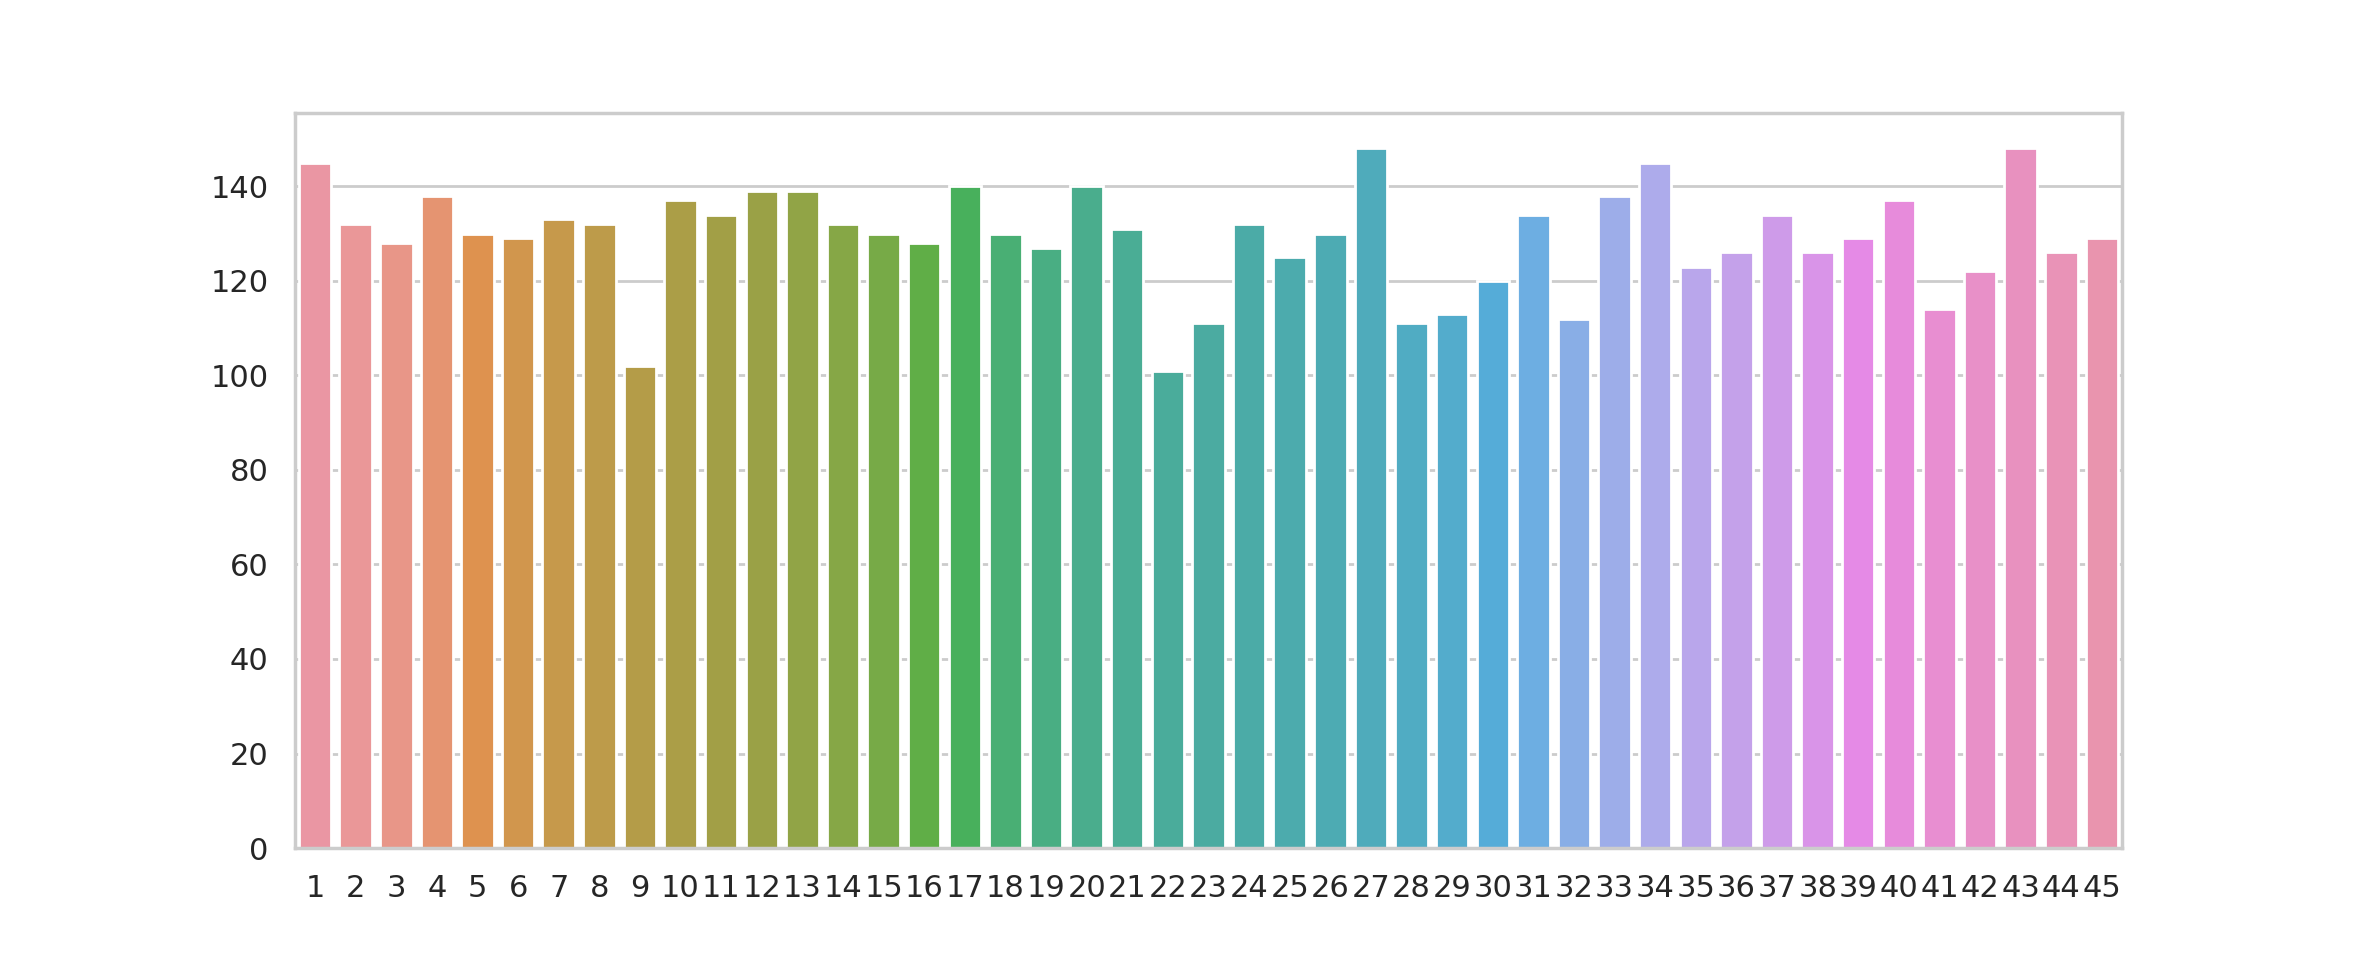

In [167]:
# 몇번에서 나온 것인지 상관 없으므로 모든 숫자의 count를 열 기준으로 더한다.
sns.barplot(x=df.sum(axis=1).index, y=df.sum(axis=1).values)

In [156]:
# 번호 순별 제일 많이 나온 숫자 뽑아내기
for i in range(len(df.columns)):
    print(df.iloc[:,i].argmax())

1
10
20
31
34
45
43


In [58]:
# 번호 순별 제일 많이 나온 숫자 뽑아내기
for i in range(1,8):
    print(lotto2.groupby(lotto2.columns[i]).size().sort_values(ascending=False).index[0])

1
10
20
31
34
45
43
